<a href="https://colab.research.google.com/github/Larissa1292/challenge_national_parks/blob/master/national_parks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lendo os bancos de dados que serão utilizados


In [4]:
park_visits <- readr::read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-09-17/national_parks.csv")
state_pop <- readr::read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-09-17/state_pop.csv")
gas_price <- readr::read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-09-17/gas_price.csv")

Parsed with column specification:
cols(
  year = col_character(),
  gnis_id = col_character(),
  geometry = col_character(),
  metadata = col_character(),
  number_of_records = col_double(),
  parkname = col_character(),
  region = col_character(),
  state = col_character(),
  unit_code = col_character(),
  unit_name = col_character(),
  unit_type = col_character(),
  visitors = col_double()
)
Parsed with column specification:
cols(
  year = col_double(),
  state = col_character(),
  pop = col_double()
)
Parsed with column specification:
cols(
  year = col_double(),
  gas_current = col_double(),
  gas_constant = col_double()
)


In [32]:
head(park_visits) #visualizando o início do dataset
tail(park_visits) #visualizando o final do dataset

year,gnis_id,geometry,metadata,number_of_records,parkname,region,state,unit_code,unit_name,unit_type,visitors
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1904,1163670,POLYGON,NA,1,Crater Lake,PW,OR,CRLA,Crater Lake National Park,National Park,1500
1941,1531834,MULTIPOLYGON,NA,1,Lake Roosevelt,PW,WA,LARO,Lake Roosevelt National Recreation Area,National Recreation Area,0
1961,2055170,MULTIPOLYGON,NA,1,Lewis and Clark,PW,WA,LEWI,Lewis and Clark National Historical Park,National Historical Park,69000
1935,1530459,MULTIPOLYGON,NA,1,Olympic,PW,WA,OLYM,Olympic National Park,National Park,2200
1982,277263,POLYGON,NA,1,Santa Monica Mountains,PW,CA,SAMO,Santa Monica Mountains National Recreation Area,National Recreation Area,468144
1919,578853,MULTIPOLYGON,NA,1,NA,NE,ME,ACAD,Acadia National Park,National Park,64000


year,gnis_id,geometry,metadata,number_of_records,parkname,region,state,unit_code,unit_name,unit_type,visitors
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1906,1263056,MULTIPOLYGON,http://nrdata.nps.gov/programs/Lands/WICA_metadata.xml,1,Wind Cave,MW,SD,WICA,Wind Cave National Park,National Park,2787
1905,1163670,POLYGON,NA,1,Crater Lake,PW,OR,CRLA,Crater Lake National Park,National Park,1400
1905,1609331,POLYGON,http://nrdata.nps.gov/programs/Lands/YELL_metadata.xml,1,Yellowstone,IM,WY,YELL,Yellowstone National Park,National Park,26188
1905,255948,MULTIPOLYGON,http://nrdata.nps.gov/programs/Lands/KICA_metadata.xml,1,Kings Canyon,PW,CA,KICA,Kings Canyon National Park,National Park,1000
1905,1528416,MULTIPOLYGON,http://nrdata.nps.gov/programs/Lands/MORA_metadata.xml,1,Mount Rainier,PW,WA,MORA,Mount Rainier National Park,National Park,928
1905,1263056,MULTIPOLYGON,http://nrdata.nps.gov/programs/Lands/WICA_metadata.xml,1,Wind Cave,MW,SD,WICA,Wind Cave National Park,National Park,2438


In [7]:
head(state_pop) #visualizando o início do dataset

year,state,pop
<dbl>,<chr>,<dbl>
1900,AL,1830000
1901,AL,1907000
1902,AL,1935000
1903,AL,1957000
1904,AL,1978000
1905,AL,2012000


In [8]:
head(gas_price) #visualizando o início do dataset

year,gas_current,gas_constant
<dbl>,<dbl>,<dbl>
1929,0.21,2.38
1930,0.20,2.30
1931,0.17,2.18
1932,0.18,2.61
1933,0.18,2.66
1934,0.19,2.67


In [12]:
install.packages("tidyverse") #instalando o pacote Tidyverse

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [78]:
require(tidyverse) #carregando o pacote Tidyverse
require(scales) #carregando o pacote 'scales' para definir a escala do gráfico

Loading required package: scales

Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



## Criando um gráfico para mostrar o número de visitas por ano



#### Primeiro precisamos selecionar as variáveis de interesse. Para isso, vamos selecionar as var. "year" e "visitors"; depois iremos somar o num de visitantes por ano.

In [0]:
visitors_year <- park_visits %>%
  select(year, visitors) %>%
  group_by(year) %>%
  summarise(total_visit = sum(visitors, na.rm = TRUE))

In [31]:
tail(visitors_year)

year,total_visit
<chr>,<dbl>
2012,281392715
2013,271305455
2014,290105230
2015,304730566
2016,328483428
Total,13764633135


In [24]:
glimpse(visitors_year) #visualizando o tipo das variáveis

Observations: 114
Variables: 2
$ year        <chr> "1904", "1905", "1906", "1907", "1908", "1909", "1910", "…
$ total_visit <dbl> 120690, 140954, 30569, 32935, 42768, 60899, 173416, 19420…


#### Agora iremos plotar o gráfico, a partir do novo dataset "visitors_year":

In [0]:
visitors_year <- visitors_year %>% ungroup()

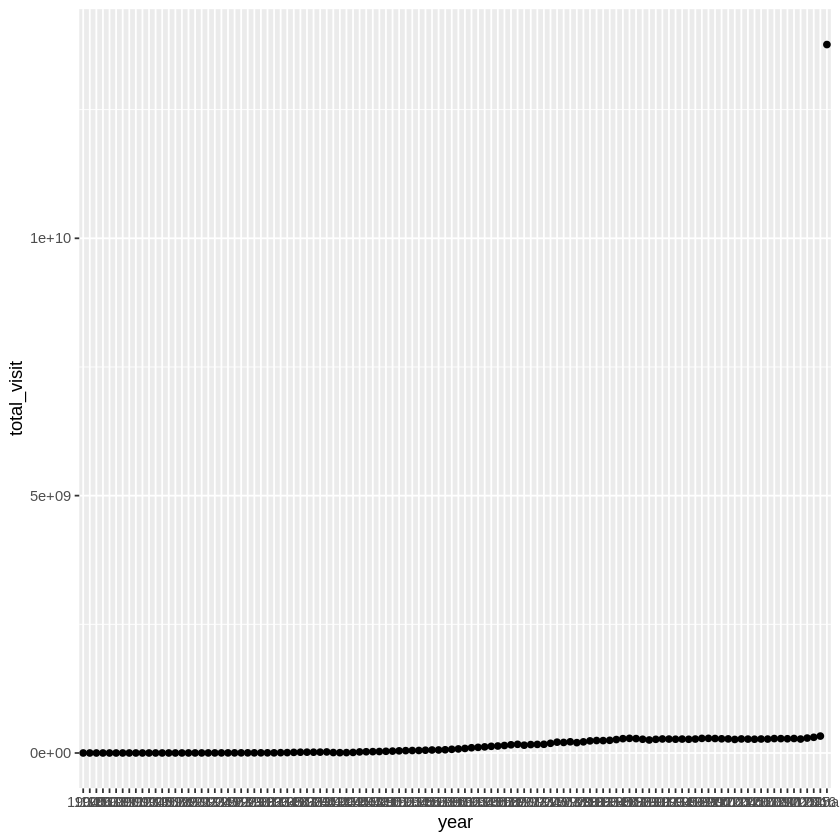

In [30]:
ggplot(visitors_year, aes(x = year, y = total_visit)) +
  geom_point()

#### Pode-se notar que existe alguma coisa estranha. Tem uma informação que é muito discrepante da massa de dados. Para isso, precisamos invertigar o porquê isso acontece. A suspeita aqui é que existe uma linha com o "Total".

In [134]:
unique(park_visits$year) #mostra cada observação sem repetição. Aqui é possível observar que realmente existe essa observação "Total".

[1] "1904"  "1941"  "1961"  "1935"  "1982"  "1919"  "1969"  "1967"  "1944" 
 [10] "1989"  "1988"  "1993"  "1955"  "1976"  "1980"  "1934"  "1951"  "1925" 
 [19] "1948"  "1931"  "1940"  "1971"  "1979"  "2011"  "2004"  "1968"  "1984" 
 [28] "1987"  "1985"  "1973"  "1936"  "1992"  "1920"  "1991"  "1957"  "1964" 
 [37] "1937"  "1966"  "1974"  "1995"  "1962"  "1929"  "1997"  "1950"  "1942" 
 [46] "1956"  "1972"  "1970"  "2000"  "1933"  "1924"  "1921"  "2010"  "1978" 
 [55] "1975"  "1906"  "1996"  "2003"  "2006"  "1947"  "2002"  "1908"  "1965" 
 [64] "1939"  "1960"  "1938"  "1963"  "2001"  "1954"  "1958"  "2013"  "1981" 
 [73] "1952"  "1923"  "1983"  "2016"  "1998"  "2007"  "2015"  "1915"  "1911" 
 [82] "1917"  "Total" "1930"  "1932"  "1922"  "1926"  "1986"  "1990"  "2014" 
 [91] "1994"  "2012"  "1977"  "2009"  "2008"  "2005"  "1999"  "1959"  "1946" 
[100] "1945"  "1953"  "1943"  "1949"  "1928"  "1927"  "1918"  "1916"  "1914" 
[109] "1913"  "1912"  "1910"  "1909"  "1905"  "1907"

#### Retirando do banco a observação "Total":

In [0]:
visitors_year <- park_visits %>%
  select(year, visitors) %>%
  filter(year != "Total") %>%
  group_by(year) %>%
  summarise(total_visit = sum(visitors, na.rm = TRUE))

In [41]:
tail(visitors_year)

year,total_visit
<chr>,<dbl>
2011,276799292
2012,281392715
2013,271305455
2014,290105230
2015,304730566
2016,328483428


#### Com o dataset que iremos usar pronto, vamos criar algumas var. necessárias para usar no comando do gráfico:

In [0]:
breaks <- seq(1910, 2010, by = 10) #criando uma sequência para montar os ticks do eixo x
labels <- c("1910", "'20", "'30", "'40", "'50", "'60", "'70", "'80", "'90", "2000", "'10") #montando manualmente os ticks do eixo x

In [0]:
breaks_y <- seq(0, max(visitors_year$total_visit), by = 50e+6) #criando uma sequência para montar os ticks do eixo y
labels_y <- unit_format(unit = "M",scale = 1e-6)(breaks_y) #montando os ticks do eixo y

## Plotando o Gráfico

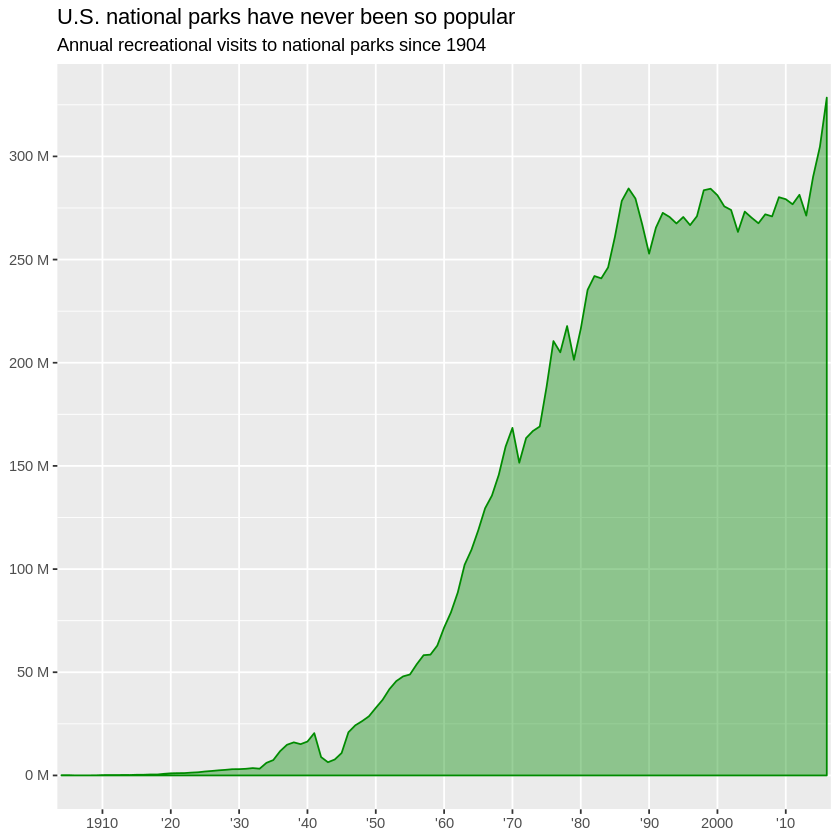

In [136]:
 ggplot(visitors_year, aes(x = year, y = total_visit, group = 1)) + #definindo o dataset e as var. de cada eixo (x,y)
  geom_area(color = "green4", fill = "green4", alpha = 0.4) + #gráfico com preenchimento de áerea
  scale_x_discrete(breaks = breaks, labels = labels) + #definindo os ticks do eixo x
  scale_y_continuous(breaks = breaks_y, labels = labels_y) + #definindo os ticks do eixo y
  labs(title = "U.S. national parks have never been so popular", 
       subtitle = "Annual recreational visits to national parks since 1904") + #escrevendo o título e subt-título
  theme(axis.title.x = element_blank(), axis.title.y = element_blank()) #retirando o título de cada eixo
  